# Live 014 - PCA ( Principal Component Analysis )

### Nesse notebook, você vai encontrar os códigos para aplicar PCA sobre um modelo de redes neurais

## 0.0. Imports

In [42]:
import pandas as pd
import numpy  as np

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import decomposition   as d

from keras.models    import Sequential
from keras.layers    import Dense
from keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt

In [47]:
np.set_printoptions(suppress=True)

## 0.1. Load Dataset

In [3]:
# load dataset
df_raw = pd.read_csv( '~/Downloads/vehicle.csv' )

# select only car and bus
df1 = df_raw[df_raw['class'].isin( ['car', 'bus'] )]

# cleaning
df1 = df1.dropna()

# features and response variable
X = df1.drop( 'class', axis=1 )
y = df1['class']

# split training and test
x, x_test, y, y_test = ms.train_test_split( X, y, test_size=0.1 )

# 1.0. Neural Network Model without PCA

In [26]:
# HOLD OUT
train_acc_list = []
val_acc_list = []
for i in range( 0, 5 ):
    # split training and validation
    x_train, x_val, y_train, y_val = ms.train_test_split( x, y, test_size=0.2 )

    # y for NN
    ohe = pp.OneHotEncoder()
    y_train = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()
    y_val = ohe.transform( y_val.values.reshape( -1, 1 ) ).toarray()


    # MLP: Neural Network 
    ## model definition
    model = Sequential()
    model.add( Dense( 2, input_dim=x_train.shape[1], activation='relu' ) ) # 2 neurons on Hidden Layer + Input Layer
    model.add( Dense( 2, activation='softmax' ) )

    ## model compile
    model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

    ### model fit ( training)
    es = EarlyStopping( monitor='val_loss', patience=10 )
    history = model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[es], verbose=0 )

    ## model evaluate
    _, train_acc = model.evaluate( x_train, y_train, verbose=0 )
    _, val_acc = model.evaluate( x_val, y_val, verbose=0 )

    #print( 'Train ACC:{} - Val ACC:{}'.format( train_acc, val_acc ) )
    train_acc_list.append( train_acc )
    val_acc_list.append( val_acc )

In [32]:
print( 'Train ACC AVG: {} +/- {}'.format( np.mean( train_acc_list ), np.std( train_acc_list ) ) )
print( 'Val ACC AVG: {} +/- {}'.format( np.mean( val_acc_list ), np.std( val_acc_list ) ) )

Train ACC AVG: 0.704054057598114 +/- 0.05543653357658905
Val ACC AVG: 0.675 +/- 0.05492342049819803


In [33]:
#plt.plot( train_acc_list, label='training'  )
#plt.plot( val_acc_list, label='validation' )
#plt.legend()

In [41]:
y_test_nn = ohe.transform( y_test.values.reshape( -1, 1 ) ).toarray()
_, test_acc = model.evaluate( x_test, y_test_nn, verbose=0 )

print( 'Test ACC:{}'.format( test_acc ) )

Test ACC:0.7096773982048035


# 2.0. Neural Network Model with PCA

In [74]:
# split training and validation
x_train, x_val, y_train, y_val = ms.train_test_split( x, y, test_size=0.2 )

# PCA 
# standardization ( centralizao e rescala)
#ss = pp.StandardScaler()
#x_train_scaler = ss.fit_transform( x_train )
#x_val_scaler = ss.transform( x_val )

# define the number of eigenvectors ( autovetor ) + eigenvalues ( autovalores )
pca = d.PCA().fit( x_train_scaler )
k = np.argmax( np.cumsum( pca.explained_variance_ratio_ ) > 0.99 )

# change data to new space
pca = d.PCA( k ).fit( x_train_scaler )

x_train = pca.transform( x_train_scaler )
x_val = pca.transform( x_val_scaler )

# y for NN
ohe = pp.OneHotEncoder()
y_train = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()
y_val = ohe.transform( y_val.values.reshape( -1, 1 ) ).toarray()


# MLP: Neural Network 
## model definition
model = Sequential()
model.add( Dense( 2, input_dim=x_train.shape[1], activation='relu' ) ) # 2 neurons on Hidden Layer + Input Layer
model.add( Dense( 2, activation='softmax' ) )

## model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

### model fit ( training)
es = EarlyStopping( monitor='val_loss', patience=10 )
history = model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[es], verbose=0 )

## model evaluate
_, train_acc = model.evaluate( x_train, y_train, verbose=0 )
_, val_acc = model.evaluate( x_val, y_val, verbose=0 )

print( 'Train ACC:{} - Val ACC:{}'.format( train_acc, val_acc ) )
#train_acc_list.append( train_acc )
#val_acc_list.append( val_acc )

Train ACC:0.9481981992721558 - Val ACC:0.9107142686843872


In [76]:
x_test_nn.shape

(62, 9)

In [75]:
x_test_nn = pca.transform( ss.transform( x_test ) )
y_test_nn = ohe.transform( y_test.values.reshape( -1, 1 ) ).toarray()
_, test_acc = model.evaluate( x_test_nn, y_test_nn, verbose=0 )

print( 'Test ACC:{}'.format( test_acc ) )

Test ACC:0.9516128897666931


# 4.0. How to determine the number of principal components ?

In [ ]:
# return autovalores
pca.explained_variance_ratio_ #eigenvalues - autovalores

# accumulated sum of autovalores
np.cumsum( pca.explained_variance_ratio_ )

# determine the number of eigenvalues that represents 95% of the variability
k = np.argmax( np.cumsum( pca.explained_variance_ratio_ ) > 0.95 )

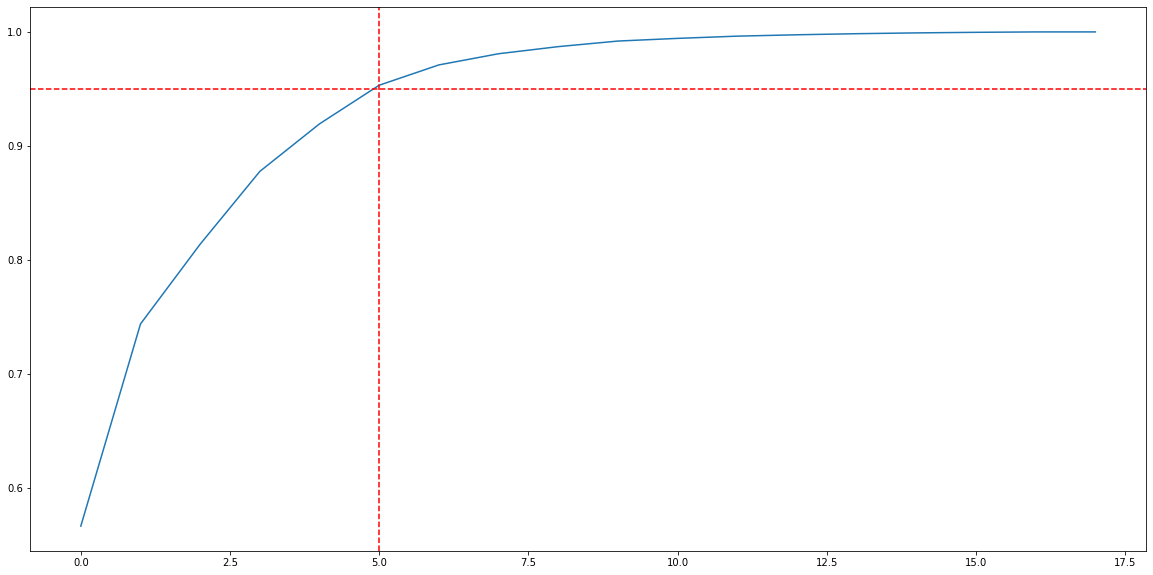

In [53]:
plt.figure(figsize=(20,10) )
plt.plot( np.cumsum( pca.explained_variance_ratio_ ) )
plt.axvline( 5, color='red', linestyle='--')
plt.axhline( 0.95, color='red', linestyle='--')

# 5.0. Why does PCA increase model performance?

## Data space
- Espaco mais organizado 

## Principais aplicações
- PCA = Processamento de Imagem - Redutor de ruido
- PCA antes de redes neurais

## Uso na estatística
- PCA = Estudo do Espacos

## PCA não permite explicabilidade
- PCA + NN = 95% - 0 Explicabilidade
- Random Forest - 85% - Explicabilidades

## PCA diminui o tamanho do modelo treinado em memória
- Random Forest - Treinada 22GB - U$ 5,00

- XGBoost -%4 - 200MB - U$0,04